# Homework 3: Hyperparameter Tuning with SVMs

The final deliverable for this homework will be this Jupyter notebook, which should include all relevant code, markdown cells before each code block describing what the code does, and any write-ups/images/plots that you wish to include.

To add a block click on `Insert > Insert Cell Below`. To make a markdown cell, click the drop-down menu at the top of this page and select `Markdown`. 

The starter code for this homework is purposely very minimal. You should get used to coding from scratch. Just follow all the instructions in the PDF you will be fine.

In [106]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

import matplotlib.pyplot as plt

In [27]:
breast_cancer = pd.read_csv("breast-cancer-wisconsin.data")

In [28]:
breast_cancer.columns

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

In [34]:
breast_cancer.head(10)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,0.197910,0.275917,0.261417,0.756212,1.692252,1.769880,-0.181831,-0.285663,-0.348430,0
1,1015425,-0.510619,-0.702465,-0.742072,-0.639557,-0.555734,-0.424771,-0.181831,-0.613096,-0.348430,0
2,1016277,0.552175,1.580427,1.599404,-0.639557,-0.106137,0.123892,-0.181831,1.351499,-0.348430,0
3,1017023,-0.156354,-0.702465,-0.742072,0.058328,-0.555734,-0.699103,-0.181831,-0.613096,-0.348430,0
4,1017122,1.260703,2.232682,2.268397,1.803038,1.692252,1.769880,2.265715,1.351499,-0.348430,1
5,1018099,-1.219147,-0.702465,-0.742072,-0.639557,-0.555734,1.769880,-0.181831,-0.613096,-0.348430,0
6,1018561,-0.864883,-0.702465,-0.407576,-0.639557,-0.555734,-0.699103,-0.181831,-0.613096,-0.348430,0
7,1033078,-0.864883,-0.702465,-0.742072,-0.639557,-0.555734,-0.699103,-0.997680,-0.613096,1.958652,0
8,1033078,-0.156354,-0.376338,-0.742072,-0.639557,-0.555734,-0.699103,-0.589756,-0.613096,-0.348430,0
9,1035283,-1.219147,-0.702465,-0.742072,-0.639557,-1.005331,-0.699103,-0.181831,-0.613096,-0.348430,0


In [30]:
"""1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)"""
breast_cancer.columns = ["id number", 'Clump Thickness',"Uniformity of Cell Size","Uniformity of Cell Shape", "Marginal Adhesion","Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [31]:
breast_cancer['Clump Thickness'].describe()

count    682.000000
mean       4.441349
std        2.822751
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Clump Thickness, dtype: float64

In [32]:
breast_cancer['Clump Thickness'] = (breast_cancer['Clump Thickness']-breast_cancer['Clump Thickness'].mean())/(breast_cancer['Clump Thickness'].std())
breast_cancer['Uniformity of Cell Size'] = (breast_cancer['Uniformity of Cell Size']-breast_cancer['Uniformity of Cell Size'].mean())/(breast_cancer['Uniformity of Cell Size'].std())
breast_cancer['Uniformity of Cell Shape'] = (breast_cancer['Uniformity of Cell Shape']-breast_cancer['Uniformity of Cell Shape'].mean())/(breast_cancer['Uniformity of Cell Shape'].std())
breast_cancer['Marginal Adhesion'] = (breast_cancer['Marginal Adhesion']-breast_cancer['Marginal Adhesion'].mean())/(breast_cancer['Marginal Adhesion'].std())
breast_cancer['Epithelial Cell Size'] = (breast_cancer['Epithelial Cell Size']-breast_cancer['Epithelial Cell Size'].mean())/(breast_cancer['Epithelial Cell Size'].std())
breast_cancer['Bare Nuclei'] = (breast_cancer['Bare Nuclei']-breast_cancer['Bare Nuclei'].mean())/(breast_cancer['Bare Nuclei'].std())
breast_cancer['Bland Chromatin'] = (breast_cancer['Bland Chromatin']-breast_cancer['Bland Chromatin'].mean())/(breast_cancer['Bland Chromatin'].std())
breast_cancer['Normal Nucleoli'] = (breast_cancer['Normal Nucleoli']-breast_cancer['Normal Nucleoli'].mean())/(breast_cancer['Normal Nucleoli'].std())
breast_cancer['Mitoses'] = (breast_cancer['Mitoses']-breast_cancer['Mitoses'].mean())/(breast_cancer['Mitoses'].std())




In [58]:
#breast_cancer['Class'] = [0 for b in breast_cancer['Class'] if b == 2]
breast_cancer.Class = breast_cancer.Class.replace({2: 0, 4: 1})
C = [.0001, .001, .01, .1, 1, 10, 100]
d = [1,2,3,4,5]
gamma = [.001, .01, .1, 1, 10, 100]
obtained = breast_cancer.values.tolist()
print(obtained[:1])

[[1002945.0, 0.1979101650332138, 0.2759172562378148, 0.2614173816114833, 0.7562116591580155, 1.6922519258801012, 1.7698802620215197, -0.1818313695624505, -0.2856631762584309, -0.3484303411022345, 0.0]]


In [115]:
#polynomial kernel
X = [x[1:10] for x in obtained]
y = [x[10] for x in obtained]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
len(X_test)
len(y_test)
X[1], X_test[1]

([-0.5106186147707328,
  -0.702465250283102,
  -0.742072229602578,
  -0.6395565452960212,
  -0.5557336866057363,
  -0.42477126288516476,
  -0.1818313695624505,
  -0.6130955900538089,
  -0.3484303411022345],
 [-1.2191473945746794,
  -0.702465250283102,
  -0.742072229602578,
  -0.6395565452960212,
  -1.0053308091029038,
  -0.6991027034985003,
  -0.9976800145729191,
  -0.6130955900538089,
  -0.3484303411022345])

The best C value is 0.1 and the best degree value is 1 with an accuracy of 0.980487804878
It seems like low degree values and low C values indicate the least accuracy. The opposite is not necessarily the highest accuracy but
the when the degree is highest and C is lowest, we get the highest accuracy present. 


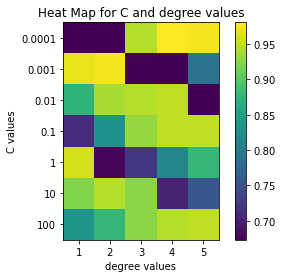

In [171]:
#NOTE: THIS IS FOR THE FIRST PART WHERE WE ARE LOOKING AT C and d

plot_d = []
plot_c = []
plot_z = []
C = [.0001, .001, .01, .1, 1, 10, 100]
d = [1,2,3,4,5]
for i in d:
    for c in C:
        plot_d.append(i)
        plot_c.append(c)
        s = SVC(C = c, kernel = 'poly', degree = i, probability = True)
        clf = s.fit(X_train, y_train)
        plot_z.append(clf.score(X_test, y_test))
d = [1,2,3,4,5]
C = [.0001, .001, .01, .1, 1, 10, 100]
#svc = SVC(C = 0.0001 , kernel = 'poly', degree = 1)
#clf = svc.fit(X_train, y_train)
#print(clf.score(X_test, y_test))
#print(plot_d)
#print(plot_c)
#print(plot_z)
index = [i for i in range(len(plot_z)) if plot_z[i] == max(plot_z)][0]
print("The best C value is " + str(plot_c[index]) + " and the best degree value is " + str(plot_d[index]) + " with an accuracy of " + str(plot_z[index]) )
new_list = [plot_z[i:i+5] for i in range(0, len(plot_z), 5)]
print("It seems like low degree values and low C values indicate the least accuracy. The opposite is not necessarily the highest accuracy but")
print("the when the degree is highest and C is lowest, we get the highest accuracy present. ")
plt.imshow(new_list)
plt.colorbar()
plt.xlabel("degree values")
plt.ylabel("C values")
xi = [i for i in range(0, len(d))]
plt.xticks(xi, d)
yi = [i for i in range(0, len(C))]
plt.yticks(yi, C)
plt.title("Heat Map for C and degree values")
plt.show()

In [ ]:
##########BELOW IS THE 2ND SVM###############

20
The best C value is 100 and the best gamma value is 0.1 with an accuracy of 0.960975609756


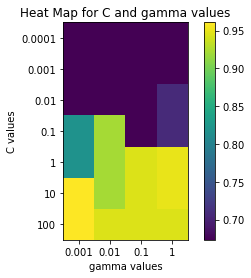

In [172]:
#NOTE: THIS IS FOR THE SECOND PART WHERE WE ARE LOOKING AT C and gamma
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]

plot_g = []
plot_c = []
plot_z = []
C = [.0001, .001, .01, .1, 1, 10, 100]
gammas
for i in gammas:
    for c in C:
        plot_g.append(i)
        plot_c.append(c)
        s = SVC(C = c, kernel = 'poly', gamma = i, probability = True)
        clf = s.fit(X_train, y_train)
        plot_z.append(clf.score(X_test, y_test))

index1 = [i for i in range(len(plot_z)) if plot_z[i] == max(plot_z)][0]
print(index1)
print("The best C value is " + str(plot_c[index1]) + " and the best gamma value is " + str(plot_g[index1]) + " with an accuracy of " + str(plot_z[index1]) )
new = [plot_z[i:i+4] for i in range(0, len(plot_z), 4)]
plt.imshow(new)
plt.colorbar()
plt.title("Heat Map for C and gamma values")
plt.xlabel("gamma values")
plt.ylabel("C values")
xi = [i for i in range(0, len(gammas))]
plt.xticks(xi, gammas)
yi = [i for i in range(0, len(C))]
plt.yticks(yi, C)
plt.show()